# The Action Index, and Prob of SO, BB, and HBP is plotted at the end 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pybaseball import team_game_logs
from pybaseball import team_ids

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


import statsmodels.api as sm
import statsmodels.tools.eval_measures as sme

import import_ipynb
import functions as func

pd.set_option('display.max_columns', None)

importing Jupyter notebook from functions.ipynb


In [2]:
# year = 1968
# teams = team_ids(year)
# teamID = teams['teamIDBR'].to_list()
# for team in teamID:
#     batting_logs = team_game_logs(year, team, "batting")
#     batting_logs['team'] = team
#     batting_logs['year'] = year

# get all game logs from 91 to 21

In [3]:
# year_list = [i for i in range(1991, 2022)]
# gameLogs_full = pd.DataFrame()
# error_count = 0
# for year in year_list:
#     teams = team_ids(year)
#     teamID = teams['teamIDBR'].to_list()
    
#     gameLogs = pd.DataFrame()
    
#     try:
#         count = 0
#         for team in teamID:
#             batting_logs = team_game_logs(year, team, "batting")
#             batting_logs['team'] = team
#             batting_logs['year'] = year
#             gameLogs = pd.concat([gameLogs, batting_logs])
#             count += 1
#             print(f"{count} {team} Complete")
#         print("-----------------------")
#         print(f"{year} Complete")
#         print("-----------------------")
#     except:
#         error_count += 1
#         print("-----------------------")
#         print(f"{year} Error")
#         print("-----------------------")
#     gameLogs_full = pd.concat([gameLogs_full, gameLogs])
# print(f"All Complete")
# print(f"Num of Errors: {error_count}")

# export file

In [4]:
# gameLogs_full.to_csv('data/GameLogs_91_21.csv')

# read file

In [5]:
raw_data = pd.read_csv('data/GameLogs_91_21.csv')
raw_data.drop(columns=raw_data.columns[0], inplace=True)

In [6]:
raw_data.shape

(137950, 33)

In [7]:
data = raw_data.copy()
gameLogs_full = data.copy()

In [8]:
# year_list = [i for i in range(1968, 1978)]

In [9]:
# action_dict = {}
# for year in year_list[:2]:
#     teams = team_ids(year)
#     teamID = teams['teamIDBR'].to_list()
    
#     gameLogs = pd.DataFrame()
    
#     count2 = 0 
#     try:
#         for team in teamID:
#             batting_logs = team_game_logs(year, team, "batting")
#             batting_logs['team'] = team
#             batting_logs['year'] = year
#             gameLogs = pd.concat([gameLogs, batting_logs], copy=True)
#             count2 += 1
#             print(f"{count2}{team} Complete")
#         num_games = gameLogs.shape[0]/2
#         PA = gameLogs['PA'].sum()
#         BB = gameLogs['BB'].sum()
#         HBP = gameLogs['HBP'].sum()
#         SO = gameLogs['SO'].sum()
#         action = (PA-BB-HBP-SO)/num_games
#         action_dict[year] = action
#         print(f"{year} Complete")
#     except:
#         print(f"{year} Error")

# pct graph

In [35]:
gameLogs_full['num_game'] = 0.5
gameLogs_grouped = gameLogs_full.groupby(['year']).agg({'PA':sum, 'BB':sum, 'HBP':sum, 'SO':sum, 'year':max, 
                                                        'num_game':sum}).copy()
# add 2021 data
gameLogs_grouped = gameLogs_grouped.append(pd.DataFrame({'PA':[181817], 'BB':[15795], 'HBP':[2111], 'SO':[42145],
                                                        'year':[2021], 'num_game':[2429]}))
# calculate pct
gameLogs_grouped['BB_pct'] = gameLogs_grouped['BB']/gameLogs_grouped['PA']
gameLogs_grouped['SO_pct'] = gameLogs_grouped['SO']/gameLogs_grouped['PA']
gameLogs_grouped['HBP_pct'] = gameLogs_grouped['HBP']/gameLogs_grouped['PA']
gameLogs_grouped['action'] = (gameLogs_grouped['PA'] - gameLogs_grouped['BB'] - gameLogs_grouped['HBP'] - gameLogs_grouped['SO'])/gameLogs_grouped['num_game']

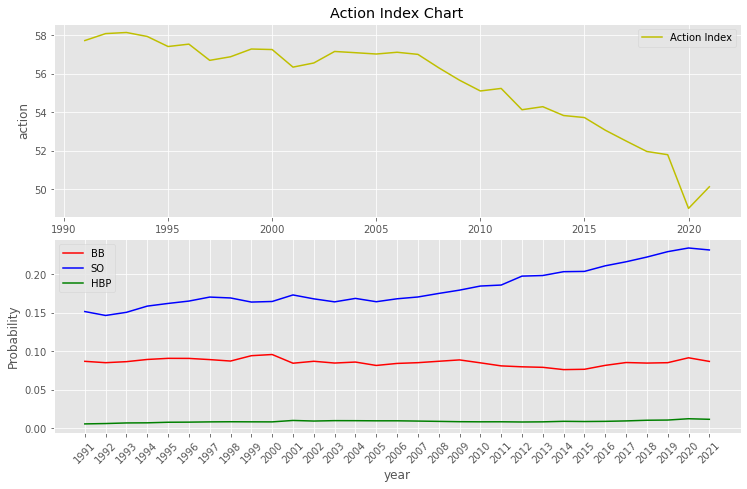

In [42]:
fig, ax = plt.subplots(2, figsize=[10,6])
plt.tight_layout(pad=0.1)

sns.lineplot(data=gameLogs_grouped, x='year', y='action', color='y', ax=ax[0])
plt.xticks(ticks=gameLogs_grouped['year'], rotation=45)
ax[0].legend(labels=["Action Index"])


sns.lineplot(data=gameLogs_grouped, x='year', y='BB_pct', color='r')
sns.lineplot(data=gameLogs_grouped, x='year', y='SO_pct', color='b')
sns.lineplot(data=gameLogs_grouped, x='year', y='HBP_pct', color='g')
ax[1].legend(labels=["BB","SO", 'HBP'])
ax[1].set_ylabel('Probability')
plt.style.use('ggplot')
ax[0].set_title('Action Index Chart')
plt.show()